# Проект. Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Открытие файла с данными и изучение общей информации. 

Импортируем библиотеку Pandas и matplotlib.pyplot как pd и plt соответственно, для удобства работы с ними.  
Прочитаем файл data.csv, сохраним его в переменной df и выведем 10 первых строк таблицы для ознакомления.

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Первичный анализ данных таблицы:
- first_day_exposition привести в более читаемый вид
- Изменить тип данных в некоторых столбцах (floors_total, balcony, parks_around3000, ponds_around3000) 
- Во многих столбцах присутствуют NaN - разобраться в причинах их возникновения

#### Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Получим общую информацию о данных таблицы df, вызвав метод info()

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Некоторые столбцы имеют пропуски. Необходимо понять почему они присутствуют и заполнить при необходимости.
Значения столбцов(floors_total, balcony, parks_around3000, ponds_around3000) перевести в натуральные числа. Названия столбцов информативны, нет нужды их форматировать. Оставим названия столбцов как есть.

### Шаг 2. Предобработка данных

### Обработка пропусков

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.
Воспользуемся методом .isnull() и подсчитаем количество для каждого столбца, применив метод .sum()

In [265]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Циклом переберем значения из списка list_columns и проверим на уникальность значения.

In [266]:
list_columns = ['balcony','is_apartment','parks_around3000','ponds_around3000']
for item in list_columns:
    print(df[item].value_counts(), '\n')

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64 

False    2725
True       50
Name: is_apartment, dtype: int64 

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64 

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64 



В столбцах balcony, parks_around3000, ponds_around3000 пропуски вероятнее всего указывают отсутствие. Поэтому заполним 0.  
В is_apartment пропуски означают "не апартаменты". Заполним на False.

In [267]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Проверим столбец rooms на уникальность, вызвав метод .unique()

In [268]:
rooms_value = df['rooms'].unique()
rooms_value

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Имеются квартиры с числом комнат 0 - это студии. Фактически это однокомнатные квартиры небольшой площади. Приравняем их к 1-комнатным. 

In [269]:
df['rooms'] = df['rooms'].replace(0, 1)

Столбцы ceiling_height и floors_total изучим, вызвав метод .describe()

In [270]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Т.к. присутствуют аномальные значения, запоним медианой. Пропуски возникли, вероятно, из за того, что продавец не знает высоту потолка в квартире.

In [271]:
ceiling_median = df['ceiling_height'].median()
df['ceiling_height'].fillna(ceiling_median, inplace=True)

In [272]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

количесто пропусков в этом столбце 86, заменим на медиану, но может получиться что общее число этажей в доме меньше этажа квартиры. Поэтому проверим на условие floor > floors_total и выведем количество строк после фильтрации методом .shape.  
Пропуски могли возникнуть, т.к. продавец не указал этажность дома, посчитав необязательной.

In [273]:
floors_total_median = df['floors_total'].median()
df['floors_total'].fillna(floors_total_median, inplace=True)
df.query('floor > floors_total').shape

(37, 22)

Так и получилось: число аномалий 37 (это 0,1% данных). Приравняем эти значения к значению этажа самой квартиры, т.к. оно ближайшее и на результаты исследований не повлияет. 

In [274]:
df.loc[(df['floor'] > df['floors_total']), 'floors_total'] = df['floor']

Напишем цикл для замены пропусков в столбцах living_area и kitchen_area. Замены осуществляем категориально по количеству комнат. Заменим на медиану, но может получиться что living_area или kitchen_area больше общей площади квартиры. Поэтому проверим на условие living_area > total_area и kitchen_area > total_area и выведем количество строк после фильтрации методом .shape.  
Пропуски могли возникнуть, т.к. продавец не знает точную площадь кухни и жилой площади.

In [275]:
for item in df['rooms'].unique():
    filter_flags = df['living_area'].isna() & (df['rooms'] == item)
    df.loc[filter_flags, 'living_area'] = df.loc[df['rooms'] == item, 'living_area'].median()

In [276]:
for item in df['rooms'].unique():
    filter_flags = df['kitchen_area'].isna() & (df['rooms'] == item)
    df.loc[filter_flags, 'kitchen_area'] = df.loc[df['rooms'] == item, 'kitchen_area'].median()

In [277]:
df.query('living_area > total_area').shape

(29, 22)

In [278]:
df.query('kitchen_area > total_area').shape

(0, 22)

In [279]:
df.query('living_area + kitchen_area > total_area').shape

(422, 22)

Получилось что в 29 квартирах living_area > total_area, а в 64 кухня и жилая площадь больше общей. Заменим на разницу total_area и kitchen_area в этих квартирах. На исследования это не повлияет

In [280]:
df.loc[((df['living_area'] + df['kitchen_area']) > df['total_area']), 'living_area'] = df['total_area'] - df['kitchen_area'] -0.0001

In [281]:
df.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Заполним пропуски в столбцах airports_nearest и cityCenters_nearest по медиане от населенного пункта, у которого есть значение в столбце locality_name.  
Тут пропуски возникли в процессе выгрузки или программа не заполнила их автоматически по картографическим данным.

In [282]:
for item in df['locality_name'].unique():
    filter_flags = df['airports_nearest'].isna() & (df['locality_name'] == item)
    df.loc[filter_flags, 'airports_nearest'] = df.loc[df['locality_name'] == item, 'airports_nearest'].median()

In [283]:
for item in df['locality_name'].unique():
    filter_flags = df['cityCenters_nearest'].isna() & (df['locality_name'] == item)
    df.loc[filter_flags, 'cityCenters_nearest'] = df.loc[df['locality_name'] == item, 'cityCenters_nearest'].median()

Для столбцов parks_nearest и ponds_nearest заполним 0 по принципу, если нет парка, нет пруда, то и значения не важны.

In [284]:
df.loc[(df['parks_around3000'] == 0), 'parks_nearest'] = 0
df.loc[(df['ponds_around3000'] == 0), 'ponds_nearest'] = 0

Для столбца locality_name определить название населенного пунка по имеющимся данным будет невозможно. Да и количество 49 никак не повлиет на исследования. Тоже самое касается days_exposition. Информацию по ним нужно запросить дополнительно.  
Оставшиеся пропуски в airports_nearest и cityCenters_nearest соответствуют населенным пунктам, расположенным далеко от центра СПб, поэтому влияния на исследования не окажут. Такая информация получена автоматически на основе картографических данных, поэтому запрашивать необходимо у разработчиков.

In [285]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5394
cityCenters_nearest     5394
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

### Вывод

Пропуски заполнены, где это уместно. Метод заполения и причины возникновения описаны для каждого отдельно выше.  
В целом оставлены пропуски там, где их мало или не повлияют на исследования. Кроме days_exposition, определить корректное число дней продажи сложно, можно продать и за неделю и продавать несколько лет. Поэтому оставим без заполнения и не будем учитывать при проведении исследований. Возможно, объявление ушло в архив, а квартира так и не продалась. В любом случае, нужно запросить у разработчиков.

### Обработка дубликатов

Найдем и обработаем дубликаты, используя метод duplicated() и посчитаем количество методом sum().

In [286]:
df.duplicated().sum()

0

### Замена типа данных

Заменим значения типа float64 на целочисленные значения int64 в столбцах с помощью метода .astype:
- last_price 
- balcony
- floors_total
- parks_around3000
- ponds_around3000
- parks_nearest
- ponds_nearest  
Проверим результаты, вызвав info().

In [287]:
list_to_convert = ['last_price','balcony','floors_total','parks_around3000','ponds_around3000','parks_nearest','ponds_nearest',]
for item in list_to_convert:
    df[item] = df[item].astype('int')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18305 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        2

### Вывод

Значения столбцов заменены на натуральные числа для более легкого визуального восприятния данных и снижения объема памяти хранения. 

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цену квадратного метра для каждой строки и создадим столбец cost_per_m2

In [290]:
df['cost_per_m2'] = df['last_price'] / df['total_area']

Переведем дату в удобный формат с помощью метода to_datetime и создадим столбцы weekday(день недели), month(месяц) и year(год)

In [291]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [292]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = df['first_day_exposition'].dt.year

Напишем функцию floor_type для определения этажа квартиры и категоризируем на варианты — первый, последний, другой.

In [293]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor ==  floors_total:
        return 'last'
    else:
        return 'other'
df['floor_type'] = df.apply(floor_type, axis= 1)

Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей. Создадим столбцы living_area_per_total_area и kitchen_area_per_total_area. 

In [294]:
df['living_area_per_total_area'] = df['living_area'] / df['total_area']
df['kitchen_area_per_total_area'] = df['kitchen_area'] / df['total_area']

Проверим, что получилось, вызвав 5 перых строк

In [295]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_m2,weekday,month,year,floor_type,living_area_per_total_area,kitchen_area_per_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,81.0,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234,424.0,408176.100629,4,7,2015,other,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000.000000,1,6,2018,other,0.320000,0.410000


### Вывод

Добавили новые столбцы, необходимые для проведения исследований и проверке гипотез в следущем шаге.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Выведем срез по столбцам total_area, last_price, rooms, ceiling_height, days_exposition и, применив .describe, получим информацию о них

In [296]:
df.loc[:,['total_area','last_price','rooms','ceiling_height','days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,20518.000000
mean,60.348651,6.541549e+06,2.078948,2.724358,180.888634
std,35.654083,1.088701e+07,1.066196,0.988298,219.727988
min,12.000000,1.219000e+04,1.000000,1.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000,45.000000
50%,52.000000,4.650000e+06,2.000000,2.650000,95.000000
75%,69.900000,6.800000e+06,3.000000,2.700000,232.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


Первое, что нужно изменить - перевести цену в млн.руб. Создадим новый столбец price_in_million

In [297]:
df['price_in_million'] = df['last_price'] / 1000000

Напишем функцию boxplot_values, которая выдает значения диаграмы размаха для требуемого столбца

In [298]:
def boxplot_values(column):
    upper_quartile = df[column].quantile(.75)
    lower_quartile = df[column].quantile(.25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = df[column][df[column] <= upper_quartile + 1.5 * iqr].max()
    lower_whisker = df[column][df[column] >= lower_quartile - 1.5 * iqr].min()
    print('Нижний квартиль:', lower_quartile)
    print('Верхний квартиль:', upper_quartile)
    print('Нижний "ус":', lower_whisker)
    print('Верхний "ус":', upper_whisker)

Напишем функцию hist_boxplot, которая строит гистограмму и диаграму размаха, выдает значения диаграмы размаха для требуемого столбца

In [350]:
def hist_boxplot(column):
    df[column].hist(bins=200, figsize=(15,5)).set(xlabel=column, ylabel='Частота');
    plt.show()
    df.boxplot(column=column, vert=False, figsize=(15,3)).set(xlabel='Частота');
    boxplot_values(column)

Построим гистограмму и диаграму размаха для total_area

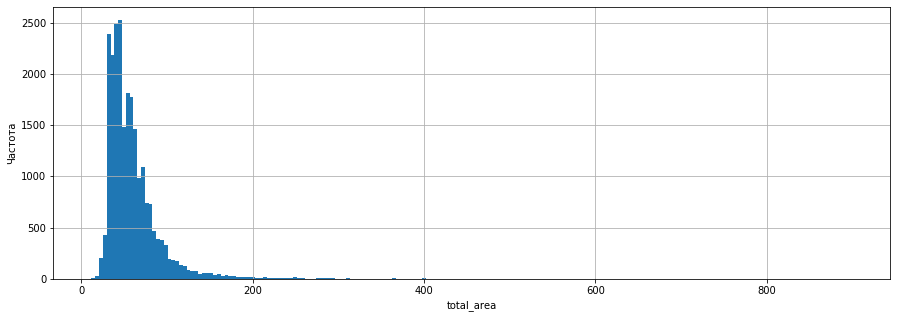

Нижний квартиль: 40.0
Верхний квартиль: 69.9
Нижний "ус": 12.0
Верхний "ус": 114.6


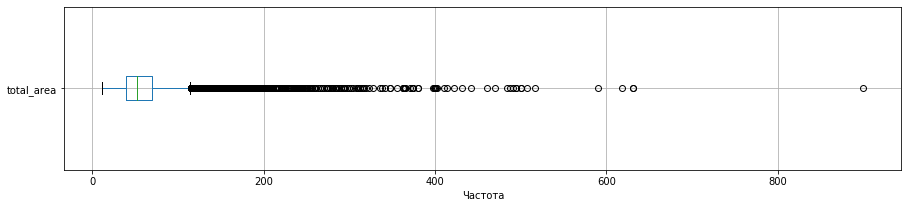

In [351]:
hist_boxplot('total_area')

Посчитаем количество значений больше верхнего "уса"

In [352]:
df.query('total_area > 114.6')['total_area'].count()

1240

Используя "верхний ус" как границу теряем 1240 строк, что достаточно много. По диаграмме распределения видно что после значения 400, значений становиться все реже. Поэтому применим это значения для верхней границы среза и построим отфильтрованную гистограмму

In [353]:
df.query('total_area > 400')['total_area'].count()

23

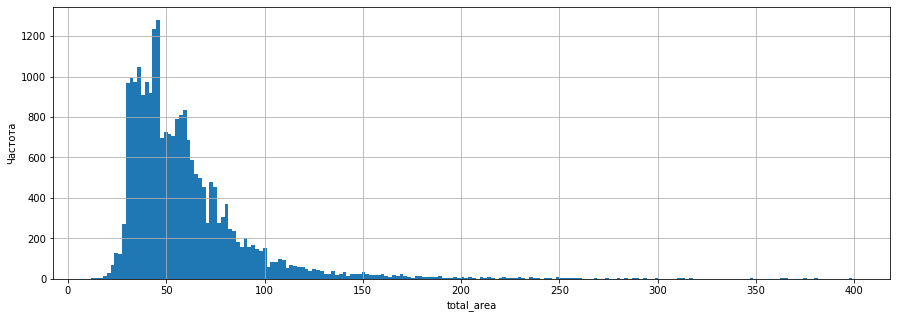

In [398]:
total_area_good = df.query('total_area < 400')
(total_area_good['total_area'].hist(bins=200, figsize=(15,5))).set(xlabel='total_area', ylabel='Частота');

Построим гистограмму и диаграму размаха для price_in_million

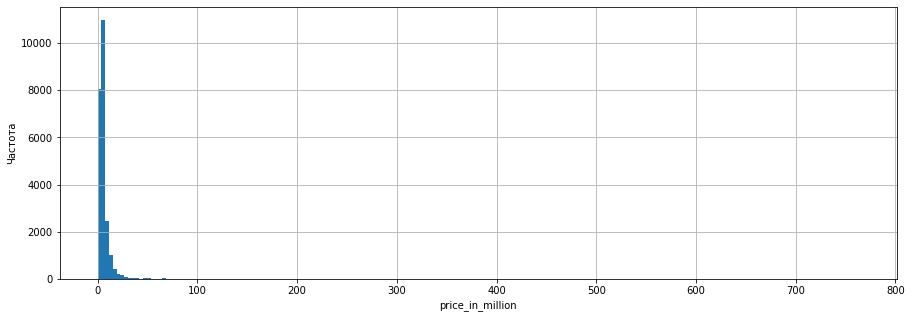

Нижний квартиль: 3.4
Верхний квартиль: 6.8
Нижний "ус": 0.01219
Верхний "ус": 11.8944


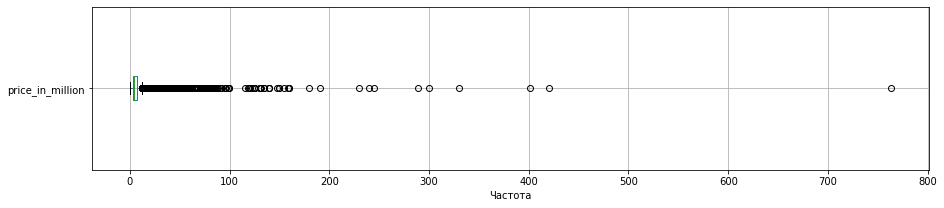

In [355]:
hist_boxplot('price_in_million')

In [356]:
df.query('price_in_million < 0.1')['price_in_million'].count()

1

In [357]:
df.query('11.89 < price_in_million < 100 ')['price_in_million'].count()

2025

По нижнему "усу" видно анамальное значение, также до 100 много значений. Ограничим верхний предел 100.

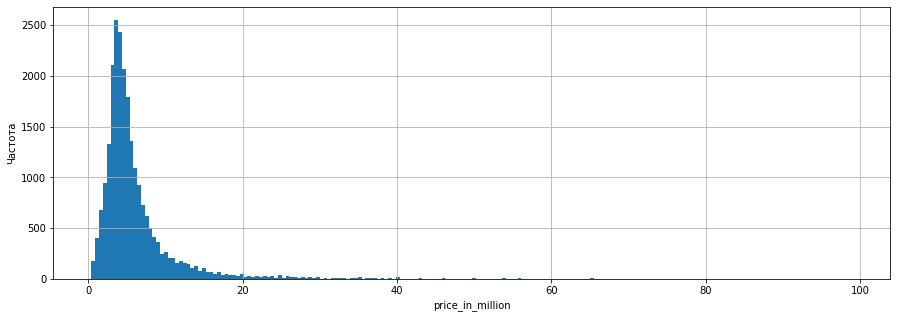

In [399]:
price_in_million_good = df.query('0.1 < price_in_million < 100')
price_in_million_good['price_in_million'].hist(bins=200, figsize=(15,5)).set(xlabel='price_in_million', ylabel='Частота');

Построим гистограмму и диаграму размаха для rooms

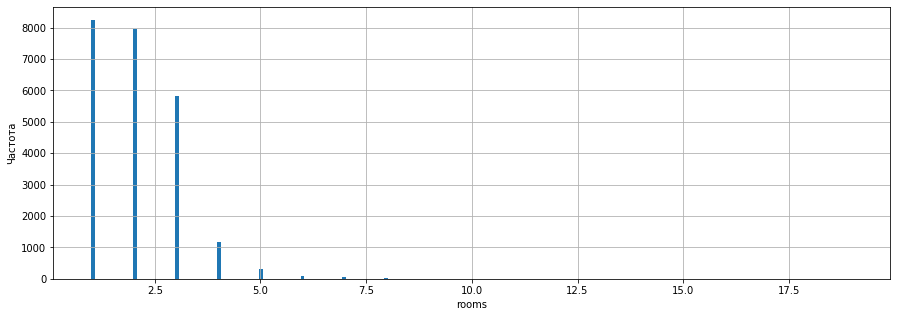

Нижний квартиль: 1.0
Верхний квартиль: 3.0
Нижний "ус": 1
Верхний "ус": 6


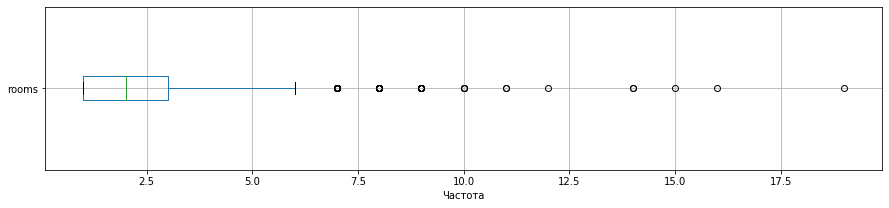

In [359]:
hist_boxplot('rooms')

Ограничим верхний предел 10 комнатами.

In [360]:
df.query('rooms > 10')['rooms'].count()

8

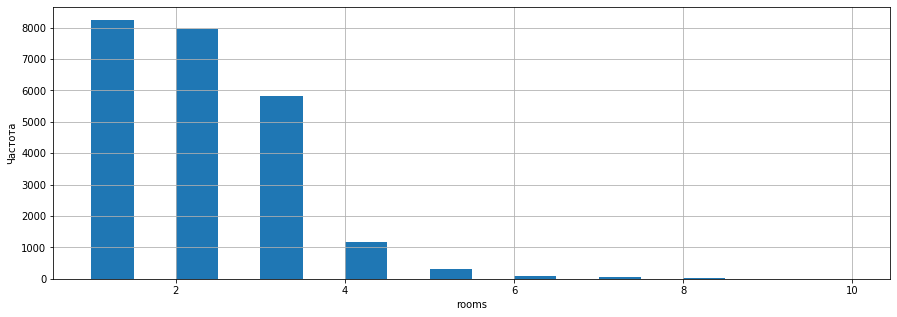

In [401]:
rooms_good = df.query('rooms <= 10')
rooms_good['rooms'].hist(bins=18, figsize=(15,5)).set(xlabel='rooms', ylabel='Частота');

Построим гистограмму и диаграму размаха для ceiling_height

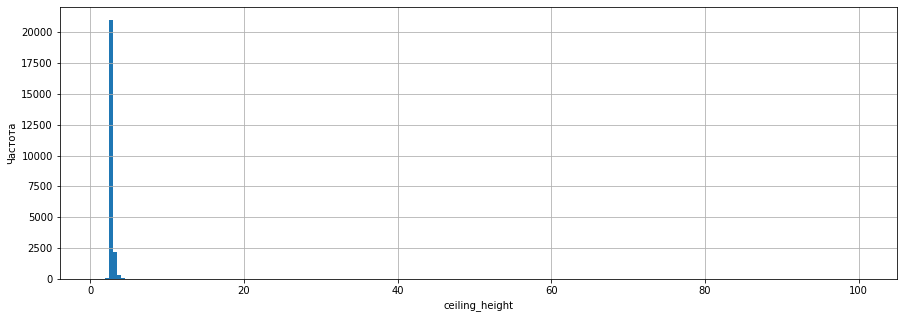

Нижний квартиль: 2.6
Верхний квартиль: 2.7
Нижний "ус": 2.45
Верхний "ус": 2.85


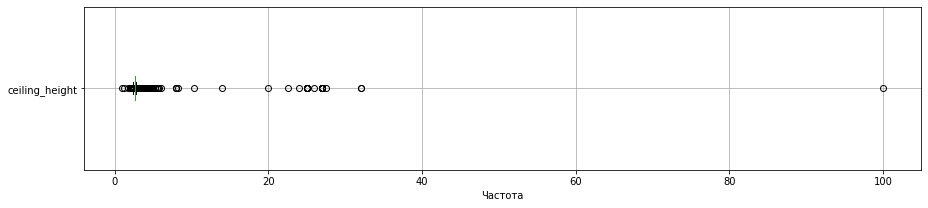

In [362]:
hist_boxplot('ceiling_height')

Жить в комнате, высотой ниже 2 метров проблематично, а потолки на первых этажах строят высокими, ограничим 5м

In [363]:
df.query('ceiling_height < 2')['ceiling_height'].count()

3

In [364]:
df.query('ceiling_height > 5')['ceiling_height'].count()

36

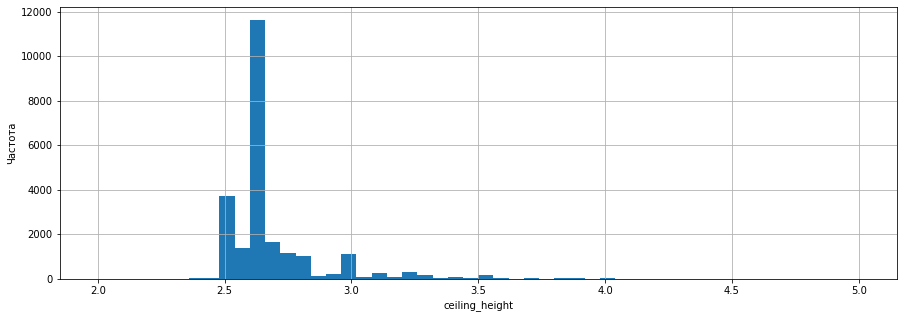

In [402]:
ceiling_height_good = df.query(' 2 <= ceiling_height <= 5')
ceiling_height_good['ceiling_height'].hist(bins=50, figsize=(15,5)).set(xlabel='ceiling_height', ylabel='Частота');

Построим гистограмму и диаграму размаха для days_exposition

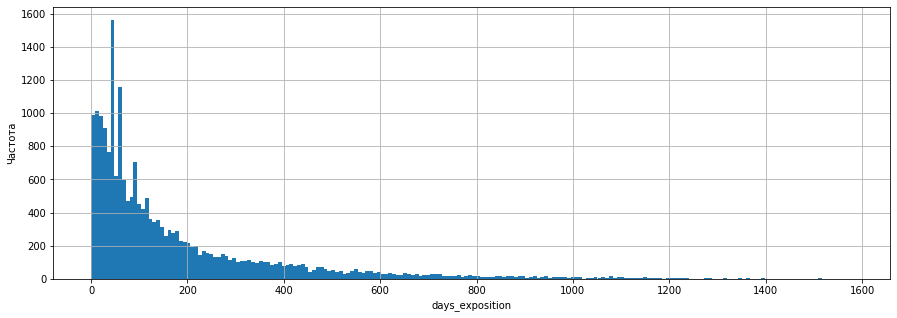

Нижний квартиль: 45.00000000000001
Верхний квартиль: 232.0
Нижний "ус": 1.0
Верхний "ус": 512.0


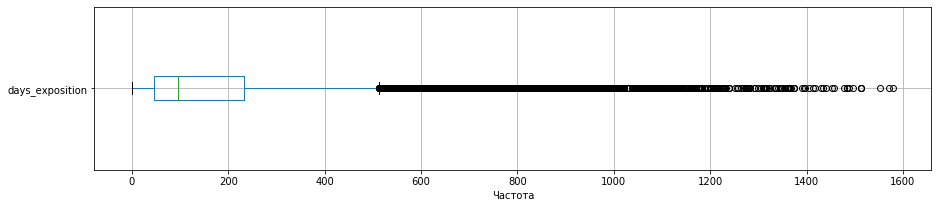

In [366]:
hist_boxplot('days_exposition')

In [367]:
df['days_exposition'].mean()

180.88863436982163

In [368]:
df['days_exposition'].median()

95.0

Среднее почти в 2 раза больше медианы. В распределении длинный хвост высоких значений, влияющих на среднее, но не на медиану. По среднему продажа за 6 месяцев, по медиане за 3. В данных явно присутствуют аномальнодолгие продажи.  
Ограничим верхний предел 1200 днями(чуть более 3 лет)

In [369]:
df.query('days_exposition > 1200')['days_exposition'].count()

91

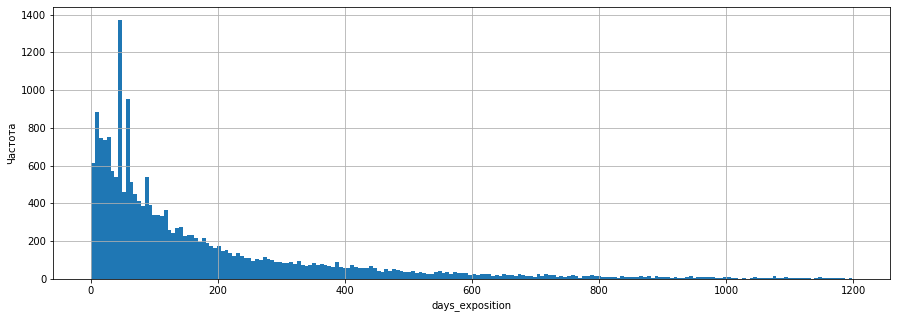

In [403]:
days_exposition_good = df.query(' days_exposition < 1200')
days_exposition_good['days_exposition'].hist(bins=200, figsize=(15,5)).set(xlabel='days_exposition', ylabel='Частота');

Основываясь на квартилях можно сказать:  
 - 25% квартир продаются за 45 дней(1,5 месяца), можно назвать это быстрой продажей
 - 75% квартир продаются за 512 дней(1,5 года), можно сказать что выше это уже очень долгие продажи

### Найдем какие факторы больше всего влияют на стоимость квартиры

Напишем функцию диаграммы рассеивания correlation_default, которая принимает на вход 2 отфильтрованные сводные таблицы и 2 столбца для диаграммы

In [404]:
def correlation_default(pivot_table_1, pivot_table_2, value_1, value_2):
    (pivot_table_1
    .pivot_table(index= value_1, values= value_2)
    .plot(style='o', grid=True, figsize=(15, 5))
    .set(xlabel=value_1, ylabel=value_2));
    print('Коррелация:', pivot_table_2[value_2].corr(pivot_table_1[value_1]))

Построим диаграмму рассеивания для площади total_area и цены price_in_million квартиры

Коррелация: 0.762338845309927


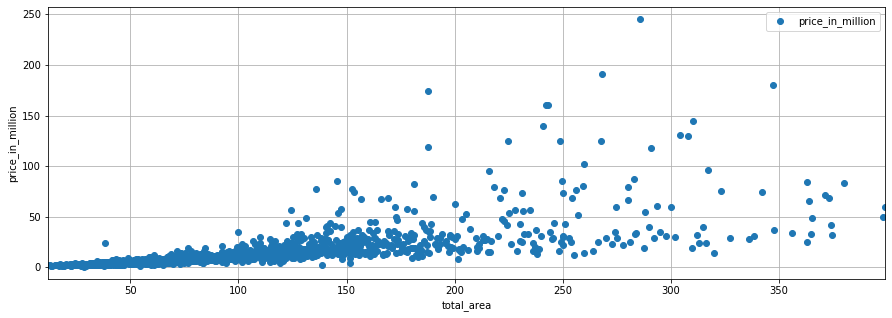

In [405]:
correlation_default(total_area_good, price_in_million_good, 'total_area', 'price_in_million')

Корреляция очень высокая, близка к 1, это говорит о том, что при увеличении кв.метров растет и цена, что логично. Хотя такой рост наблюдается до 200м2 и цены 50 млн.руб., далее зависимость не такая устойчивая.

Построим диаграмму рассеивания для удаленности от центра cityCenters_nearest и цены price_in_million квартиры

Коррелация: -0.30015530806899143


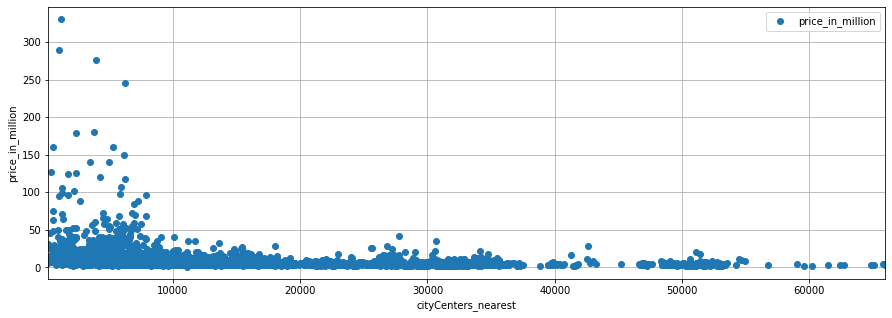

In [406]:
correlation_default(df, price_in_million_good, 'cityCenters_nearest', 'price_in_million')

Корреляция отрицательна, что логично - чем ближе квартира к центру, тем дороже. Отчетливо видно, что меньше 10 км, цена резко растет вверх. Это пригодится для исследований дальше. 

Напишем функцию диаграммы рассеивания correlation_bar, аналогичную correlation_default, но строит bars.

In [407]:
def correlation_bar(pivot_table_1, pivot_table_2, value_1, value_2):
    (pivot_table_1
    .pivot_table(index= value_1, values= value_2)
    .plot(kind='bar', grid=True, figsize=(15, 5))
    .set(xlabel=value_1, ylabel=value_2));
    print('Коррелация:', pivot_table_2[value_2].corr(pivot_table_1[value_1]))

Построим диаграмму рассеивания для количества комнат rooms и цены price_in_million квартиры.

Коррелация: 0.4711278791693386


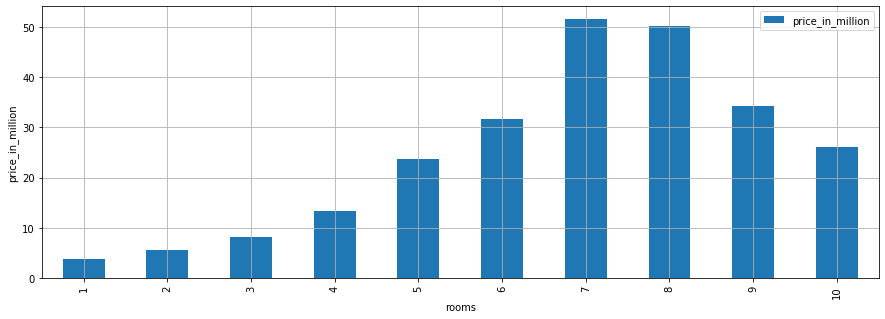

In [408]:
correlation_bar(rooms_good, price_in_million_good, 'rooms', 'price_in_million')

Корреляция около 0,5 - значит каждое увеличение количество комнат в квартире на 1, сопровождается увеличением цены примерно на 50%. Однако, такая тенденция наблюдается до 7 комнат, далее увеличение комнат на влияет на цену.

Построим диаграмму рассеивания для типа этажности квартиры и цены price_in_million квартиры.

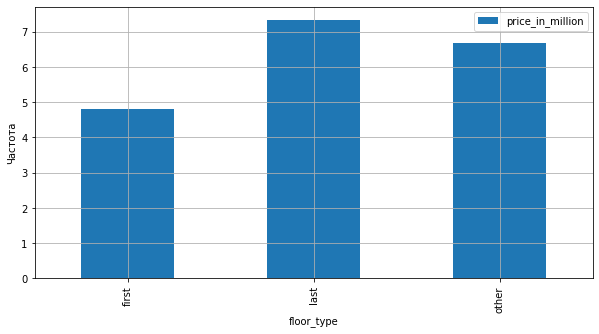

In [411]:
(df
    .pivot_table(index='floor_type', values='price_in_million')
    .plot(kind='bar',style='o', grid=True, figsize=(10, 5))
    .set(xlabel='floor_type', ylabel='Частота'));

По диаграмме видно, что наивысшая цена в категории последнего этажа, чуть ниже, все остальные и самые дещевые квартиры на 1-м этаже.

Построим диаграмму рассеивания для дня недели, месяцаб года и цены price_in_million квартиры.

Коррелация: -0.003133643633470351
Коррелация: 0.007317460781195277
Коррелация: -0.05366780809042529


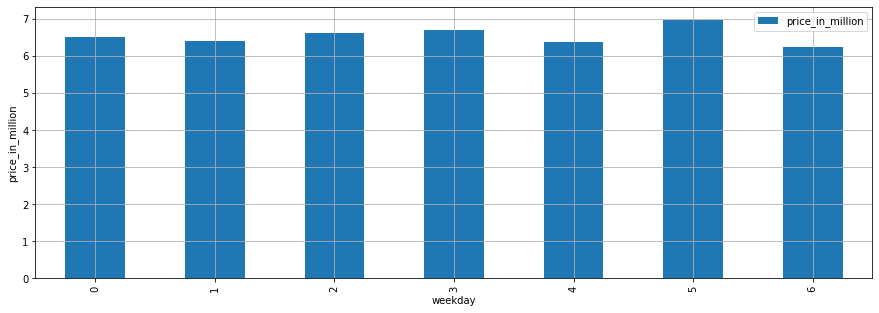

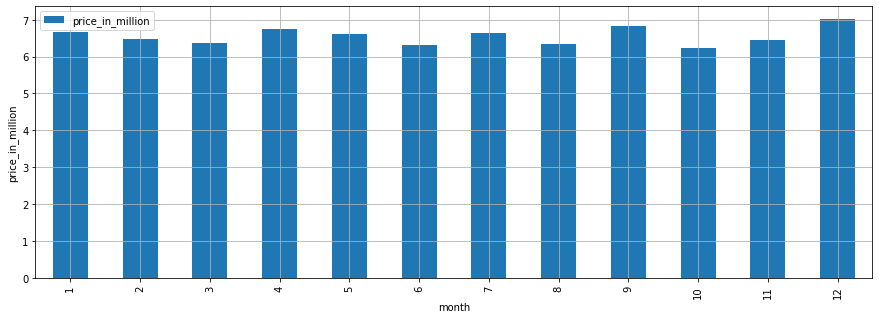

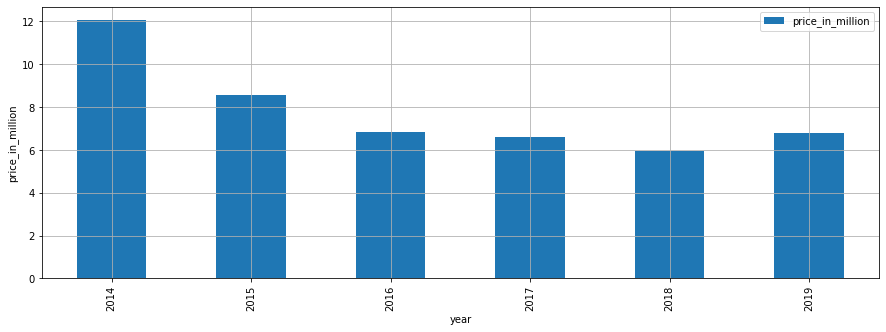

In [410]:
correlation_bar(df, price_in_million_good, 'weekday', 'price_in_million')
correlation_bar(df, price_in_million_good, 'month', 'price_in_million')
correlation_bar(df, price_in_million_good, 'year', 'price_in_million')

Корреляция по всем 3 диаграммам очень низкая, меньше 10%. Однако, в субботу размещают самые дорогие квартиры, в декабре и сентябре также, а вот в 2014 были самые дорогие квартиры, после кризиса цены на квартиры начали падать, вплодь до 2018, в 2019 наметился рост.

Проведем дополнительные исследования по количеству объявлений в день недели, месяц, год

In [413]:
def correlation_bar_count(pivot_table_1, pivot_table_2, value_1, value_2):
    (pivot_table_1
    .pivot_table(index= value_1, values= value_2, aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(15, 5))
    .set(xlabel=value_1, ylabel=value_2));
    print('Коррелация:', pivot_table_2[value_2].corr(pivot_table_1[value_1]))

Коррелация: -0.003133643633470351
Коррелация: 0.007317460781195277
Коррелация: -0.05366780809042529


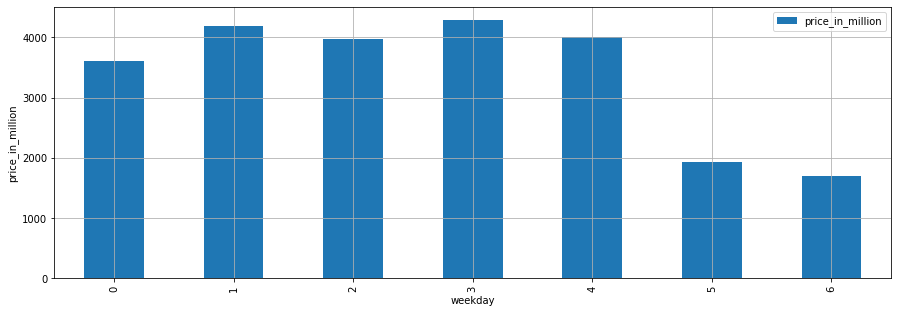

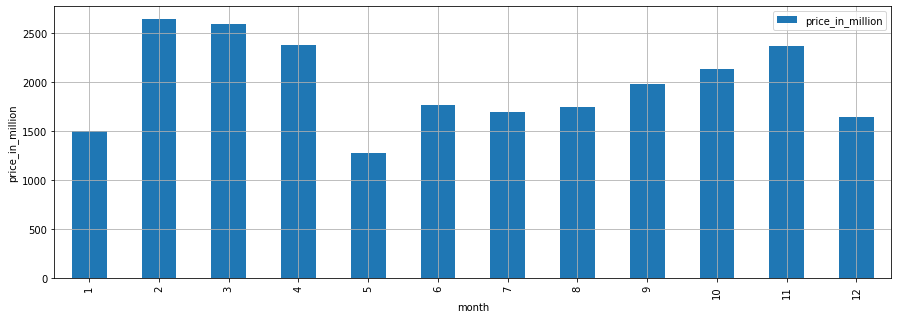

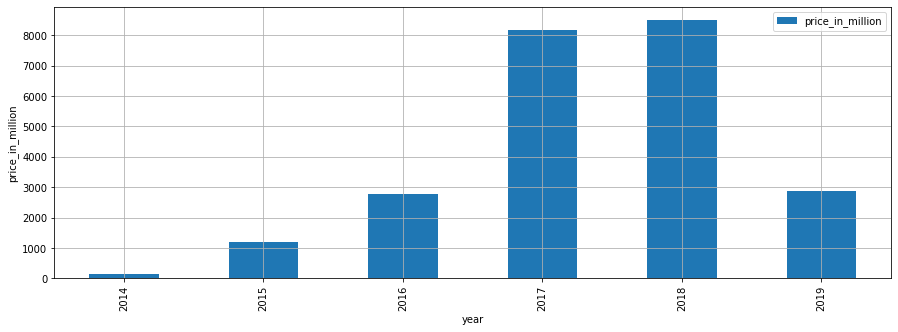

In [414]:
correlation_bar_count(df, price_in_million_good, 'weekday', 'price_in_million')
correlation_bar_count(df, price_in_million_good, 'month', 'price_in_million')
correlation_bar_count(df, price_in_million_good, 'year', 'price_in_million')

Корреляция по всем 3 диаграммам очень низкая, меньше 10%. Однако, в субботу и воскресенье размещают в 2 раза меньше объявлений, чем в будние дни.  
Январь, май и декабрь самые низкие по популярности размещения, в то время как февраль, март, апрель и ноябрь самые активные в подаче объявлений.  
По годам: Яндекс.Недвижемость запустила свою работу в СПб в конце 2014 года как самостоятельная площадка(не агрегатор объявлений), соответственно каждый год наблюдается рост по количеству объявлений в год.

Определим ТОП-10 населенных пунктов по количеству объявлений и расчитаем цену кв.метра по населенному пункту

                     cost_per_m2  count
locality_name                          
Санкт-Петербург    104761.904762  15721
Пушкин             100000.000000    369
деревня Кудрово     91860.465116    299
посёлок Парголово   91642.857143    327
посёлок Мурино      85878.462169    522
посёлок Шушары      76876.172608    440
Колпино             74723.748474    338
Гатчина             67796.610169    307
Всеволожск          65789.473684    398
Выборг              58158.319871    237


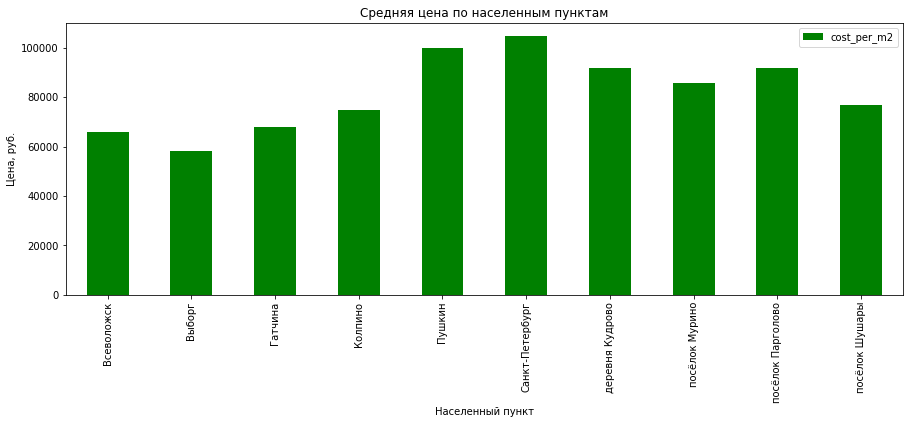

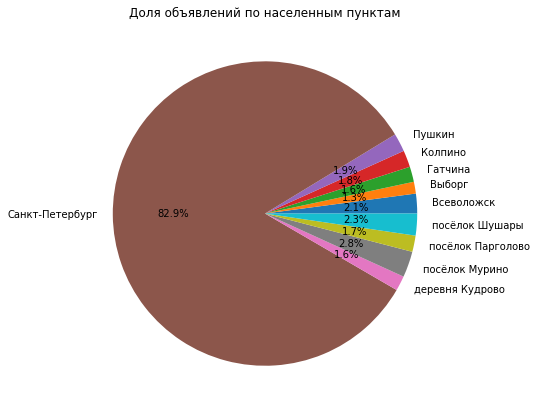

In [380]:
top_10_locality_names = df['locality_name'].value_counts().head(10)
top_10_popular_cities = (df.query('locality_name in @top_10_locality_names.index')
            .pivot_table(index='locality_name', values='cost_per_m2', aggfunc=['median', 'count'])
            )
top_10_popular_cities.columns = ['cost_per_m2','count']
print(top_10_popular_cities.sort_values('cost_per_m2', ascending=False))
(top_10_popular_cities
     .plot(y='cost_per_m2', kind='bar', title='Средняя цена по населенным пунктам', color='g', figsize=(15, 5))
     .set(xlabel='Населенный пункт', ylabel='Цена, руб.'));
(top_10_popular_cities
     .plot(y='count', autopct='%1.1f%%', kind='pie', title='Доля объявлений по населенным пунктам', legend=False, figsize=(7, 7))
     .set(ylabel=''));

По количеству объявлений у Санкт-Петербурга подавляющее большинство - 82.9%, далее посёлок Мурино - 2.8%, посёлок Шушары - 2.3% и т.д

Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [381]:
df.groupby('locality_name')['cost_per_m2'].median().sort_values(ascending=False)

locality_name
посёлок Лисий Нос        121616.221359
Санкт-Петербург          104761.904762
Зеленогорск              101666.666667
Кудрово                  100000.000000
Пушкин                   100000.000000
                             ...      
поселок Совхозный         12629.129129
деревня Выскатка          12335.480902
деревня Вахнова Кара      11688.311688
посёлок станции Свирь     11481.481481
деревня Старополье        11000.000000
Name: cost_per_m2, Length: 364, dtype: float64

ТОП-5 самых дорогих квартир по кв.м и ТОП-5 самых дешевых указан выше. Примечательно, что СПб не самый дорогой, есть поселок Лисий Нос, цена там самая высокая. Наверное, аналогично Рублевке в Москве.

### Определим центр города СПб по графику зависимости цены price_in_million от удаленности от центра cityCenters_nearest. Посчитаем и округлим расстояние в км.

Создадим столбец с расстоянием до центра в километрах cityCenters_nearest_km: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график, показывающий, как цена зависит от удалённости от центра.

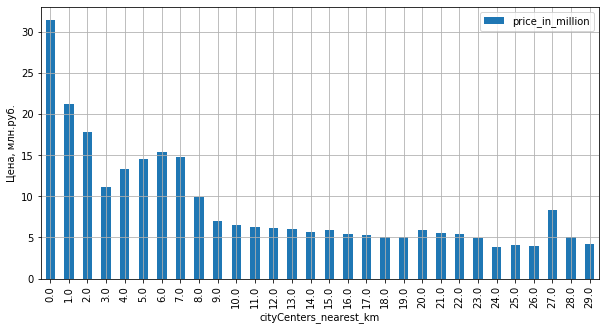

In [416]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round()
(df
    .query('locality_name == "Санкт-Петербург" ')
    .pivot_table(index='cityCenters_nearest_km', values='price_in_million', aggfunc='mean')
    .plot(kind='bar',style='o', grid=True, figsize=(10, 5))
    .set(xlabel='cityCenters_nearest_km', ylabel='Цена, млн.руб.'));

По графику видно, что цена резко возрастает на расстоянии меньше 8 км. Это и есть центр СПб

Построим гистограмму для total_area для СПб

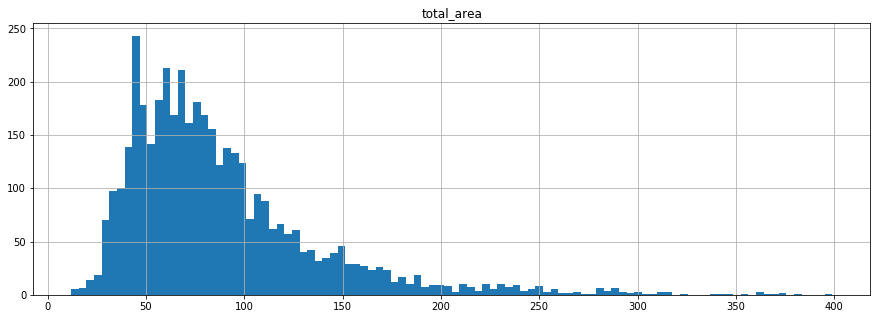

In [418]:
spb_center =  df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8')
(spb_center
     .query('total_area < 400')
     .hist(column = 'total_area', bins=100, figsize=(15,5)));

Построим гистограмму для price_in_million в СПб

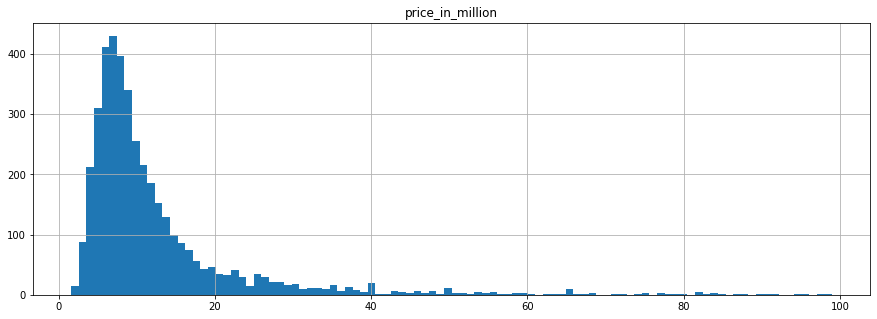

In [384]:
(spb_center
     .query('0.1 < price_in_million < 100')
     .hist(column = 'price_in_million', bins=100, figsize=(15,5)));

Построим гистограмму для rooms в СПб

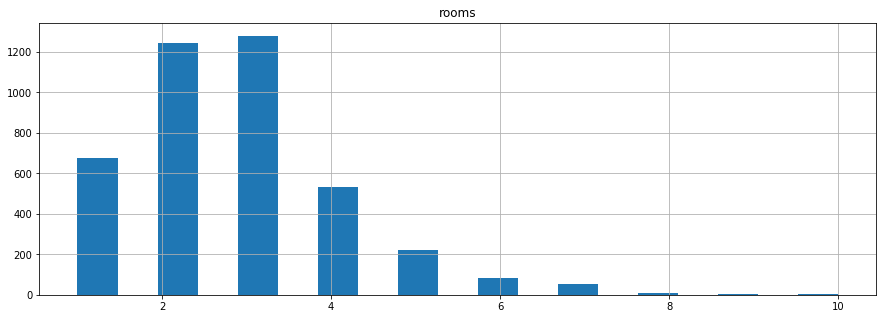

In [385]:
(spb_center
     .query('rooms <= 10')
     .hist(column = 'rooms', bins=19, figsize=(15,5)));

Построим гистограмму для ceiling_height в СПб

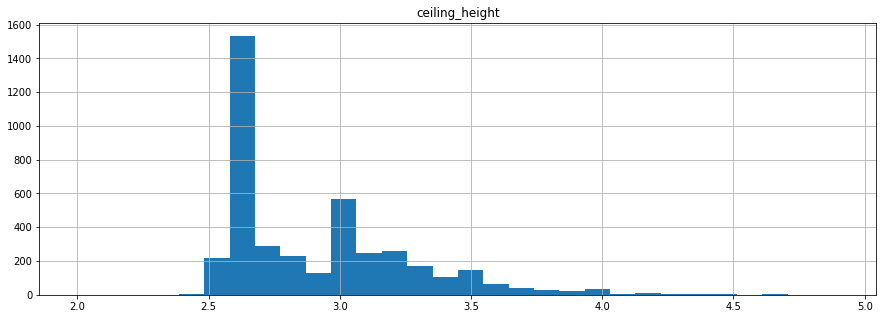

In [386]:
(spb_center
     .query(' 2 <= ceiling_height <= 5')
     .hist(column = 'ceiling_height', bins=30, figsize=(15,5)));

### Найдем какие факторы больше всего влияют на стоимость квартиры в СПб

Построим диаграмму рассеивания  и посчитаем корреляцию для площади total_area и цены price_in_million квартиры

0.638837274470686

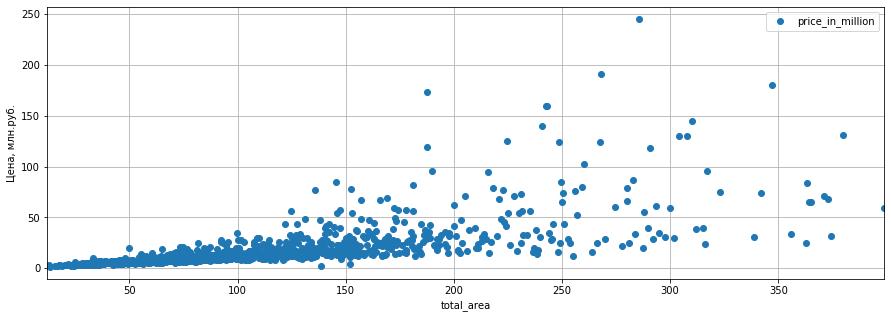

In [426]:
(spb_center
    .query('total_area < 400')
    .pivot_table(index='total_area', values='price_in_million')
    .plot(style='o', grid=True, figsize=(15, 5))
    .set(xlabel='total_area', ylabel='Цена, млн.руб.'));
spb_center['price_in_million'].corr(spb_center['total_area'])

Корреляция около 63%, ниже, чем в целом по региону. Такой рост наблюдается до 200м2 и цены 50 млн.руб., далее зависимость не такая устойчивая. Как и в целом для региона

Построим диаграмму рассеивания и посчитаем корреляцию для количества комнат rooms и цены price_in_million квартиры

0.3415964325266049

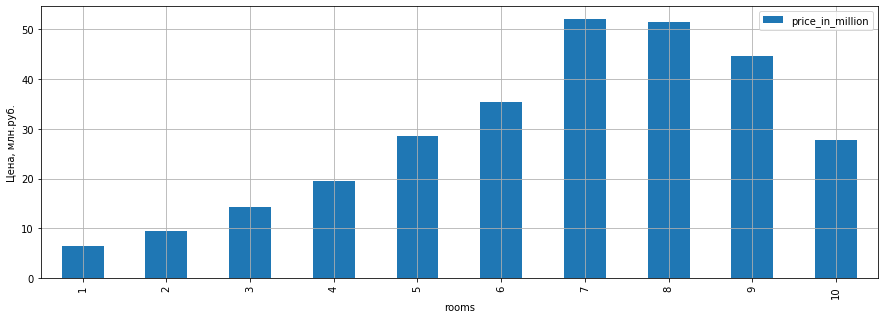

In [420]:
(spb_center
    .query('rooms <= 10')
    .pivot_table(index='rooms', values='price_in_million')
    .plot(kind='bar', style='o', grid=True, figsize=(15, 5))
    .set(xlabel='rooms', ylabel='Цена, млн.руб.'));
spb_center['price_in_million'].corr(spb_center['rooms'])

Корреляция 0,34 меньше, чем общее 0,5. Также тенденция наблюдается до 7 комнат, далее увеличение комнат на влияет на цену.

Построим диаграмму рассеивания и посчитаем корреляцию от расстояния до центра cityCenters_nearest_km и цены price_in_million квартиры

-0.07602026670211762

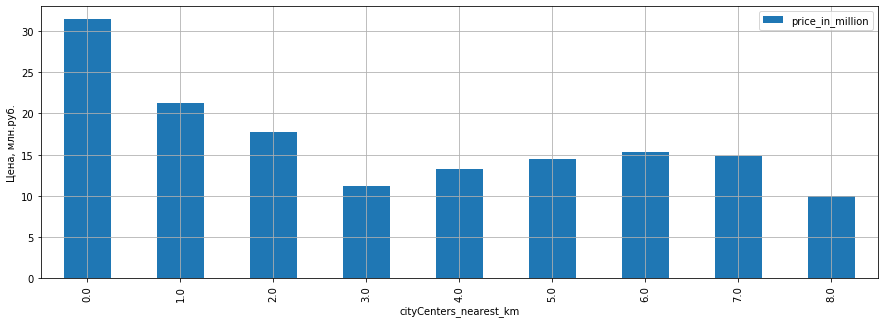

In [427]:
(spb_center
    .pivot_table(index='cityCenters_nearest_km', values='price_in_million')
    .plot(kind='bar', style='o', grid=True, figsize=(15, 5))
    .set(xlabel='cityCenters_nearest_km', ylabel='Цена, млн.руб.'));
spb_center['price_in_million'].corr(spb_center['cityCenters_nearest_km'])

Корреляция отрицательна 7%, что ниже общей в 30%. В центре цена уже нет так растет с уменьшением раастрояния.

Построим диаграмму рассеивания для типа этажности квартиры и цены price_in_million квартиры.

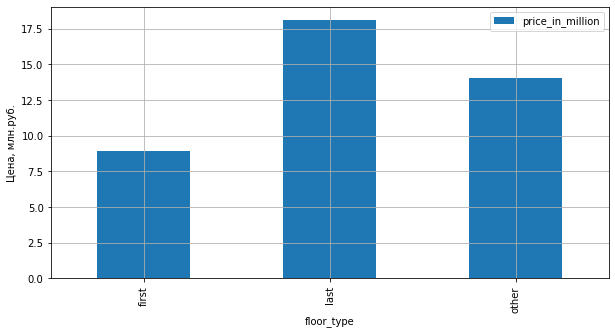

In [428]:
(spb_center
    .pivot_table(index='floor_type', values='price_in_million')
    .plot(kind='bar',style='o', grid=True, figsize=(10, 5))
    .set(xlabel='floor_type', ylabel='Цена, млн.руб.'));

Тенденция  для центра сохранилась: наивысшая цена в категории последнего этажа, чуть ниже, все остальные и самые дещевые квартиры на 1-м этаже.

Построим диаграмму рассеивания для дня недели, месяца, года и цены price_in_million квартиры в центре СПб.

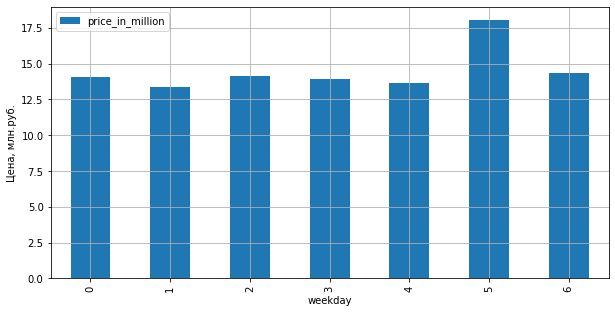

In [429]:
(spb_center
    .pivot_table(index='weekday', values='price_in_million', aggfunc='mean')
    .plot(kind='bar',style='o', grid=True, figsize=(10, 5))
    .set(xlabel='weekday', ylabel='Цена, млн.руб.'));

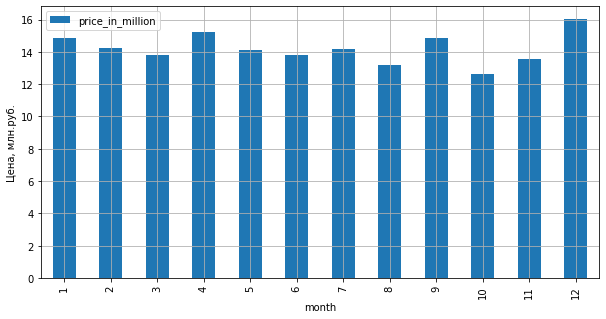

In [430]:
(spb_center
    .pivot_table(index='month', values='price_in_million', aggfunc='mean')
    .plot(kind='bar',style='o', grid=True, figsize=(10, 5))
    .set(xlabel='month', ylabel='Цена, млн.руб.'));

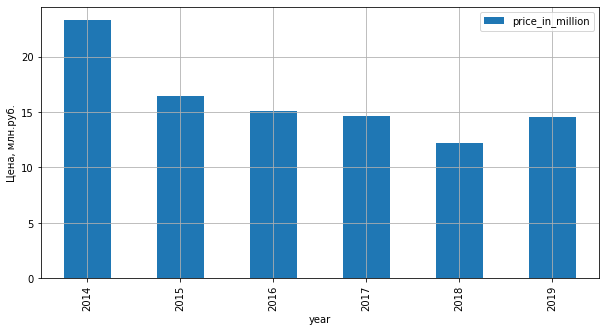

In [431]:
(spb_center
    .pivot_table(index='year', values='price_in_million', aggfunc='mean')
    .plot(kind='bar',style='o', grid=True, figsize=(10, 5))
    .set(xlabel='year', ylabel='Цена, млн.руб.'));

Тенденция сохранилась: в субботу размещают самые дорогие квартиры, в декабре, сентябре и апреле также, в 2014 были самые дорогие квартиры, после кризиса цены на квартиры начали падать, вплодь до 2018, в 2019 наметился рост.

### Шаг 5. Общий вывод

  
**Зависимость площади от цены квартиры**
- Корреляция в общем высокая, близка к 1, это говорит о том, что при увеличении кв.метров растет и цена, что логично. Хотя такой рост наблюдается до 200м2 и цены 50 млн.руб., далее зависимость не такая устойчивая
- В центре СПб корреляция около 63%, ниже, чем в целом по региону.  

**Зависимость удаленности от центра и цены квартиры**
- Корреляция в общем отрицательна, что логично - чем ближе квартира к центру, тем дороже. Отчетливо видно, что меньше 10 км, цена резко растет вверх.
- Корреляция в центре СПб  -7%, что ниже общей в 30%. В центре цена уже нет так растет с уменьшением расстояния.  

**Зависимость количества комнат и цены квартиры**
- Корреляция в общем около 0,5 - значит каждое увеличение количество комнат в квартире на 1, сопровождается увеличением цены примерно на 50%. Однако, такая тенденция наблюдается до 7 комнат, далее увеличение комнат на влияет на цену.
- Корреляция в центре СПб 0,34 меньше, чем общее 0,5. Также тенденция наблюдается до 7 комнат, далее увеличение комнат на влияет на цену.  

**Зависимость типа этажности квартиры и цены квартиры**
- В общем наивысшая цена в категории последнего этажа, чуть ниже, все остальные и самые дещевые квартиры на 1-м этаже.
- Тенденция для центра СПб сохранилась: наивысшая цена в категории последнего этажа, чуть ниже, все остальные и самые дещевые квартиры на 1-м этаже.  

**Зависимость дня недели, месяца, года и цены квартиры**
- В общем корреляция по всем 3 диаграммам очень низкая, меньше 10%. Однако, в субботу размещают самые дорогие квартиры, в декабре и сентябре также, а вот в 2014 были самые дорогие квартиры, после кризиса цены на квартиры начали падать, вплодь до 2018, в 2019 наметился рост.
- В центре СПб тенденция сохранилась: в субботу размещают самые дорогие квартиры, в декабре, сентябре и апреле также, в 2014 были самые дорогие квартиры, после кризиса цены на квартиры начали падать, вплодь до 2018, в 2019 наметился рост.


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод